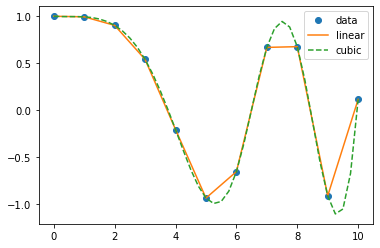

<Figure size 720x360 with 0 Axes>

41


In [1]:
import numpy as np
from scipy.interpolate import interp1d


x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')


xnew = np.linspace(0, 10, num=41, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.figure(figsize=(10,5))
plt.show()

print(len(xnew))


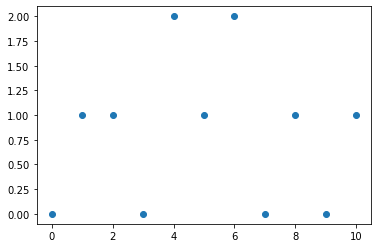

In [2]:
a = np.linspace(0,10,num=11, endpoint=True)
b = np.array([0,1,1,0,2,1,2,0,1,0,1])

plt.plot(a,b,"o")

In [3]:
from scipy import signal
%matplotlib widget

plt.plot(a, signal.square(b), "o")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [4]:
from scipy.interpolate import interp1d

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.array([0,1,1,0,2,1,2,0,1,0,1])

f1 = interp1d(x, y, kind='nearest')
#f2 = interp1d(x, y, kind='previous')
#f3 = interp1d(x, y, kind='next')


xnew = np.linspace(0, 10, num=1001, endpoint=True)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(x, y, 'o')
plt.plot(xnew, f1(xnew), '-')
plt.legend(['data', 'nearest', 'previous', 'next'], loc='best')
plt.show()



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [5]:
a = np.linspace(-1, 1, num=100, endpoint= True)
len(a)

100

In [6]:
import numpy as np
import matplotlib.gridspec
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed, IntSlider, HBox, Layout, Output, VBox
import ipywidgets as widgets
from scipy import signal
from scipy.interpolate import interp1d

%matplotlib widget

In [41]:
class Interpolation():
    
    def __init__(self):
        self.out = Output(layout={'width': '980px', 'height': '500px'})
        self.axs = []
        
        
        # Interpolation function type
        self.interp_funct_types = {'rect':0, 'tri':1, 'quadratic spline':2, 'cubic spline':3, 'sinc':4}
        
        #self.funct returns the string of above that is chosen. I'll use it later for the type of interpolation
        self.funct = list(self.interp_funct_types.keys())[0]
        self.funct_idx = self.interp_funct_types[self.funct]
        
        #Here I define the array to draw the interpolating function
        self.interp_f_x = np.linspace(-5,5,num=1001, endpoint=True)
        self.interp_f_y = np.zeros(1001)
        #self.interp_f_y = np.cos(self.interp_f_y)
        
        # Dropdown menu to select interpolation function type 
        self.funct_menu = widgets.Dropdown(options=self.interp_funct_types.keys(), value=self.funct, 
                                            description="Choisir fonction d'interpolation:", layout=Layout(width='max-content'))
        self.funct_menu.observe(self.menu_callback, names='value')
        
        
        #self.x_funct = np.linspace(0, 10, num= 1000, endpoint=True)
        #self.y_funct = np.sin(self.x_funct)
        self.x = np.linspace(0, 20, num=201, endpoint=True)
        self.y = np.sin(self.x)
        self.x_val = np.linspace(0, 20, num=21, endpoint=True)
        self.y_val = np.sin(self.x_val)
        self.x_interp = np.linspace(0, 20, num=201, endpoint=True)
        self.y_interp = np.zeros(201)
        #self.f = interp1d(self.x, self.y, kind='nearest')
        #self.y_interp = self.f(self.x_interp)
        
        self.print_err = widgets.Text(
            value=str(self.error()), description="Erreur d'approximation:")
        
        #For the interpolation function
        #self.functx = np.linspace(-1, 1, num=100, endpoint= True)
        #self.functy = np.full(shape=100, fill_value=1, dtype=np.int)
        
        self.init_figure()
        #plt.show()
        
        display(VBox([self.out,]),VBox([self.funct_menu, self.print_err]))
        plt.tight_layout(pad=0.1, w_pad=1.0, h_pad=0.1)
        

    
    
    def init_figure(self):
        with self.out:
            self.fig = plt.figure(constrained_layout=False)
            self.gs = self.fig.add_gridspec(2,2)
    
            #Plot the interpolating function
            self.axs.append(self.fig.add_subplot(self.gs[:1, -1]))
            self.axs[0].set_title("Interpolating function")
            self.axs[0].set_yticks([1e-4], minor=True)
            self.axs[0].yaxis.grid(True, which='minor',
                                   color='black', linewidth='0.5')
            self.axs[0].set_xticks([1e-4], minor=True)
            self.axs[0].xaxis.grid(True, which='minor',
                                   color='black', linewidth='0.5')
            self.axs[0].set_xlabel("t[s]")
            position = [-3,-2, -1, 0, 1, 2, 3]
            self.axs[0].set_xticks(position)
            self.axs[0].set_xlim([-3,3])
            self.axs[0].set_ylim([-2,2])
            #self.axs[0].plot(self.interp_f_x, self.interp_f_y, color='blue', linewidth=0.2)
            self.update_interp_f(init=True)
            #Plot the signal interpolated
           
            self.axs.append(self.fig.add_subplot(self.gs[1,:]))
            self.axs[1].set_title("Interpolation")
            self.axs[1].plot(self.x, self.y, '--')
            self.axs[1].plot(self.x_interp, self.interpolation(), '-')
            self.axs[1].plot(self.x_val, self.y_val, 'or')
        
    def interpolation(self):
        if(self.funct_idx==0):
            f = interp1d(self.x_val, self.y_val, kind="nearest")
            return f(self.x_interp)
        if(self.funct_idx==1): 
            f = interp1d(self.x_val, self.y_val, kind="linear")
            return f(self.x_interp)
        if(self.funct_idx==2): 
            f = interp1d(self.x_val, self.y_val, kind="quadratic")
            return f(self.x_interp)
        if(self.funct_idx==3): 
            f = interp1d(self.x_val, self.y_val, kind="cubic")
            return f(self.x_interp)
        if(self.funct_idx==4): 
            return self.sinc_interp(self.y_val, self.x_val, self.x_interp)
        
    def sinc_interp(self, x, s, u):
        """
        Interpolates x, sampled at "s" instants
        Output y is sampled at "u" instants ("u" for "upsampled")     
        """

        if len(x) != len(s):
            raise Exception('x and s must be the same length')

        # Find the period    
        T = s[1] - s[0]

        sincM = np.tile(u, (len(s), 1)) - np.tile(s[:, np.newaxis], (1, len(u)))
        y = np.dot(x, np.sinc(sincM/T))
        return y
        
    
    def menu_callback(self, value):
        self.funct = value['new']
        self.funct_idx = self.interp_funct_types[self.funct]
        self.update_interp_f()
        self.y_interp = self.interpolation()
        self.axs[1].lines[1].set_data(self.x_interp, self.y_interp)
        self.print_err_callback()
        
     
    def print_err_callback(self):
        self.print_err.value = str(self.error())
        
        
    #Definition of the rect function
    def rect(val):
        return np.where(np.abs(val)<=0.5, 1, 0)
    
    #Definition of the linear spline function
    def tri(self,x):
        if(x>=-1. and x<0.): return(x+1.)
        elif(x>=0. and x<=1.): return(-x+1.)
        else: return 0.
        
    def quadratic_spline(self,x):
        return x**2
            
    def cubic_spline(self,x):
        return x**3
    
    def sinc(self, x):
        return np.sinc(x)
    
    #Funtion to calculate the aproximation error
    def error(self):
        err = 0.
        for i in range(len(self.x_interp)):
            err += (self.y_interp[i] - self.y[i])**2
            
        return err
    
    #Function to update the interpolation function, so it changes the interpolation function plot and the
    #interpolation plot
    def update_interp_f(self, init=False):
       
        if(self.funct_idx==0):
            y = np.where(np.abs(self.interp_f_x)<=0.5, 1, 0)
            
        
        if(self.funct_idx==1):
            y = list(map(self.tri,self.interp_f_x))
            
        if(self.funct_idx==2):
            y = list(map(self.quadratic_spline,self.interp_f_x))
            
        if(self.funct_idx==3):
            y = list(map(self.cubic_spline,self.interp_f_x))
            
            
        if(self.funct_idx==4):
            y = list(map(self.sinc,self.interp_f_x))
            
        if init:
            self.axs[0].plot(self.interp_f_x, y, color='blue', linewidth=0.5)
        else:
            self.axs[0].lines[0].set_data(self.interp_f_x, y)
        
            
        
        
        

In [42]:
def create_multipleChoice_widget(description, options, correct_answer):
    if correct_answer not in options:
        options.append(correct_answer)
    
    correct_answer_index = options.index(correct_answer)
    
    radio_options = [(words, i) for i, words in enumerate(options)]
    alternativ = widgets.RadioButtons(
        options = radio_options,
        description = '',
        disabled = False
    )
    
    description_out = widgets.Output()
    with description_out:
        print(description)
        
    feedback_out = widgets.Output()

    def check_selection(b):
        a = int(alternativ.value)
        if a==correct_answer_index:
            s = '\x1b[6;30;42m' + "Correct" + '\x1b[0m' +"\n" #green color
        else:
            s = '\x1b[5;30;41m' + "Incorrect" + '\x1b[0m' +"\n" #red color
        with feedback_out:
            clear_output()
            print(s)
        return
    
    check = widgets.Button(description="submit")
    check.on_click(check_selection)
    
    
    return widgets.VBox([description_out, alternativ, check, feedback_out])

Q1 = create_multipleChoice_widget('Which function approximates f best?',['Rect','Tri','Quadratic spline', 'Cubic spline', 'Sinc'],'Cubic spline')
Q2 = create_multipleChoice_widget('What is the maximum sampling period that allows perfect reconstruction?',['Rect','Tri','Quadratic spline', 'Cubic spline', 'Sinc'],'Cubic spline')

In [43]:
plt.close("all")
interp = Interpolation()
display(Q1)
display(Q2)

In [40]:
fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(2, 2)
f3_ax1 = fig3.add_subplot(gs[0, :])
f3_ax1.set_title('gs[0, :]')
f3_ax2 = fig3.add_subplot(gs[1, :-1])
f3_ax2.set_title('gs[1, :-1]')
f3_ax3 = fig3.add_subplot(gs[1:, -1])
f3_ax3.set_title('gs[1:, -1]')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'gs[1:, -1]')

In [10]:
def tri(x):
    if(x>=-1. and x<0.): return(x+1.)
    elif(x>=0. and x<=1.): return(-x+1.)
    else: return 0.

In [11]:
interp_f_x = np.linspace(-2,2,num=205, endpoint=True)
interp_f_y = np.zeros(205)

In [ ]:
interp_f_y=np.array(list(map(tri,interp_f_x)))

In [ ]:
interp_f_y

In [9]:
questions = ["What is 1 + 1",
             "Who is the 45th president of the United States?",
             "True or False... The Toronto Maple Leafs have won 13 Stanley   Cups?",
             "What was the last year the Toronto Maple Leafs won the Stanley   Cup?",
             "True or False... The current Prime Minister of Canada is Pierre Elliot Tredeau?"]
answer_choices = ["a)1\nb)2\nc)3\nd)4\n:",
                  "a)Barack Obama\nb)Hillary Clinton\nc)Donald Trump\nd)Tom Brady\n:",
                  ":",
                  "a)1967\nb)1955\nc)1987\nd)1994\n:",
                  ":"]
correct_choices = [{"b", "2"},
                   {"c", "donald trump"},
                   {"true", "t"},
                   {"a", "1967"},
                   {"false", "f"}]
answers = ["1 + 1 is 2",
           "The 45th president is Donald Trump",
           "",
           "The last time the Toronto Maple Leafs won the Stanley Cup was 1967",
           "The current Prime Minster of Canada is Justin Tredeau"]


def quiz():
    score = 0
    for question, choices, correct_choice, answer in zip(questions, answer_choices, correct_choices, answers):
        print(question)
        user_answer = input(choices).lower()
        if user_answer in correct_choice:
            print("Correct")
            score += 1
        else:
            print("Incorrect", answer)
    print(score, "out of", len(questions), "that is", float(score / len(questions)) * 100, "%")

if __name__ == "__main__":
    quiz()

What is 1 + 1


a)1
b)2
c)3
d)4
: 1


Incorrect 1 + 1 is 2
Who is the 45th president of the United States?


a)Barack Obama
b)Hillary Clinton
c)Donald Trump
d)Tom Brady
: b


Incorrect The 45th president is Donald Trump
True or False... The Toronto Maple Leafs have won 13 Stanley   Cups?


: m


Incorrect 
What was the last year the Toronto Maple Leafs won the Stanley   Cup?


a)1967
b)1955
c)1987
d)1994
: m


Incorrect The last time the Toronto Maple Leafs won the Stanley Cup was 1967
True or False... The current Prime Minister of Canada is Pierre Elliot Tredeau?


: k


Incorrect The current Prime Minster of Canada is Justin Tredeau
0 out of 5 that is 0.0 %
